In [1]:
import pandas as pd
import numpy as np
current_state = np.random.get_state()
np.random.set_state(current_state)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from scipy import stats
from scipy.stats import ttest_ind
import time 
import random

from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from IPython.display import display

In [2]:
# Read the file
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=[" "])

In [3]:
print('Shape:', df.shape)
display(df.head())

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('Transposed')
df.head().T

Transposed


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df['SeniorCitizen'] = pd.Categorical(df['SeniorCitizen']) #Changing from int to categorical
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [6]:
del df["customerID"] # Deleting the custumerID column

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.dtypes

gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [11]:
numerics = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics)
objects_df = df.select_dtypes(exclude=numerics)

In [12]:
numeric_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [13]:
objects_df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [14]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

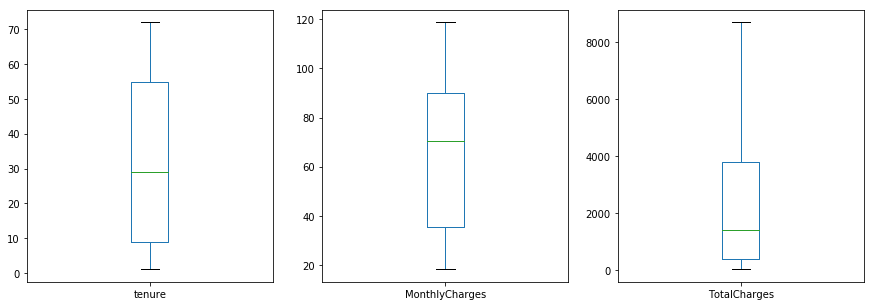

In [15]:
# Box plots
numeric_df.plot(kind='box', subplots=True, figsize=(15,5))
plt.plot()
plt.show()

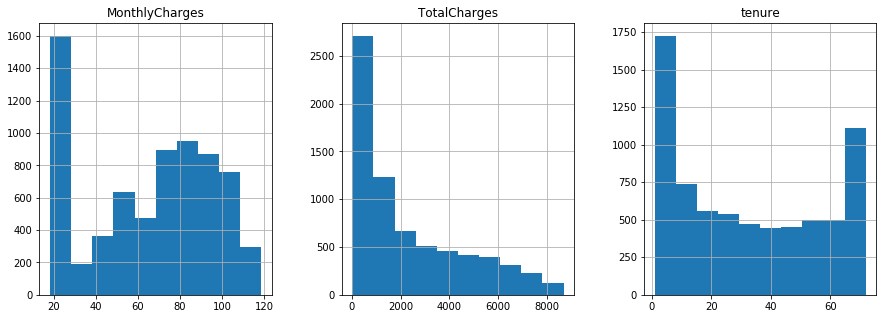

In [16]:
# Histogram plots
numeric_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()
plt.show()

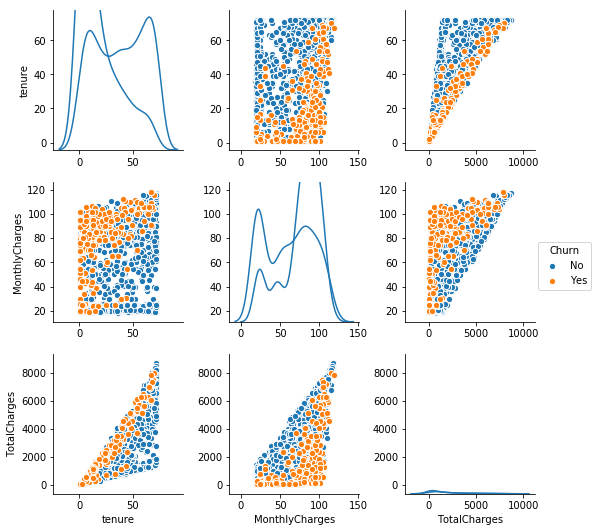

In [17]:
numeric_df = pd.concat([numeric_df, df["Churn"]], axis=1) #Add the 'Churn' variable to the numeric dataset
g = sns.PairGrid(numeric_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

/home/mache/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


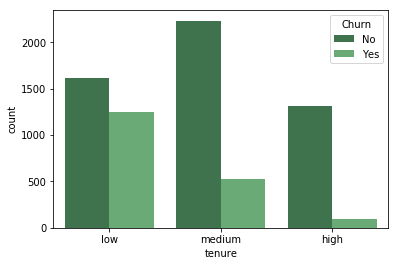

In [18]:
tenure_bins=pd.cut(numeric_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_df, palette="Greens_d")

/home/mache/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


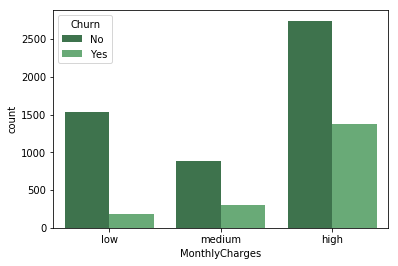

In [19]:
MonthlyCharges_bins=pd.cut(numeric_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_df, palette="Greens_d");

/home/mache/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


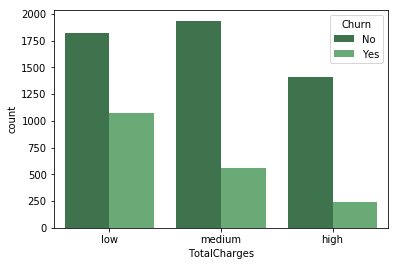

In [20]:
TotalCharges_bins=pd.cut(numeric_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_df, palette="Greens_d");

In [21]:
bins = pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

/home/mache/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


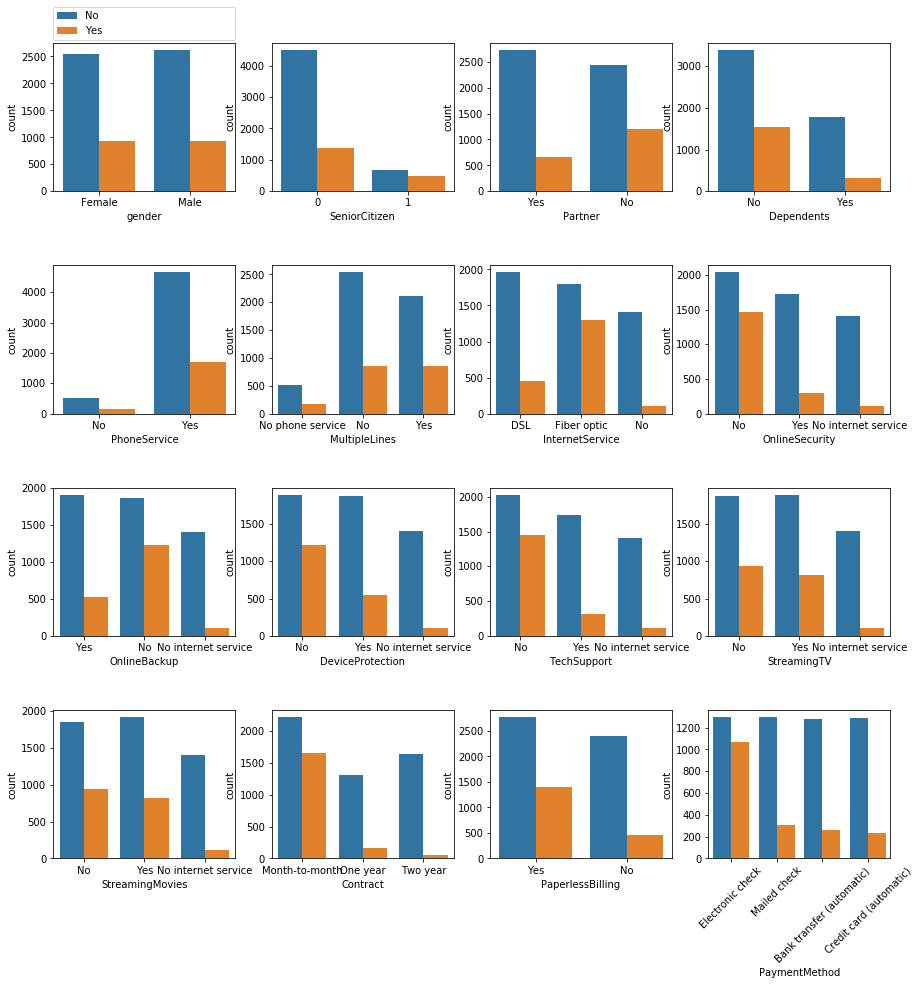

In [22]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_df.iloc[:,i], hue=objects_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

## Input, output and Holdout

In [23]:
data=pd.concat([bins,objects_df],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors

In [24]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features]
Y = dummy["Churn_Yes"]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [25]:
Y_train.head()

3974    0
5353    0
3527    1
738     0
3474    0
Name: Churn_Yes, dtype: uint8

## Models

### Logistic Regression (Classification L2)

In [26]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2')

In [27]:
# Define the parameter values that should be searched
C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [28]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [29]:
# instantiate and fit the grid
grid = GridSearchCV(log_reg_model, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
# Logistic Regression
start = time.time()
grid.fit(X_train, Y_train)
log_reg_pred = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Runtime 1.84


In [31]:
# view the complete results
grid.grid_scores_

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77067, std: 0.00854, params: {'C': 0.001},
 mean: 0.80000, std: 0.00819, params: {'C': 0.01},
 mean: 0.80071, std: 0.00741, params: {'C': 0.1},
 mean: 0.80018, std: 0.00837, params: {'C': 1},
 mean: 0.80000, std: 0.00862, params: {'C': 10},
 mean: 0.80000, std: 0.00862, params: {'C': 100},
 mean: 0.80000, std: 0.00862, params: {'C': 1000}]

In [32]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.800711111111
{'C': 0.1}


In [33]:
log_reg_model = linear_model.LogisticRegression(penalty = 'l2', C=0.1)

             precision    recall  f1-score   support

   Churn_No       0.84      0.91      0.87      4146
  Churn_Yes       0.66      0.51      0.58      1479

avg / total       0.79      0.80      0.79      5625



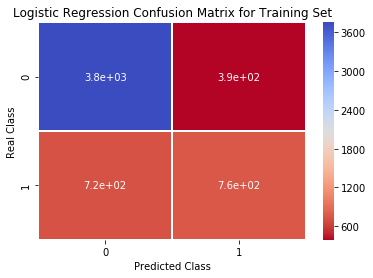

Cross Validation Accuracy Scores: 0.801(+/- 0.01)
Cross Validation Accuracy Scores - Test Set: 0.790(+/- 0.06)


In [34]:
# Printing classification report
print(classification_report(Y_train, log_reg_pred, target_names=['Churn_No', 'Churn_Yes']))

#building confusion matrix
conf_matrix_train_logR = confusion_matrix(Y_train, log_reg_pred)

#creating heatmap of confusion matrix
sns.heatmap(conf_matrix_train_logR,
           cmap='coolwarm_r',
           annot=True,
           linewidths=0.5)
plt.title('Logistic Regression Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_logR = cross_val_score(log_reg_model, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_logR.mean(), scores_logR.std()*2))

scores_logRTest = cross_val_score(log_reg_model, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_logRTest.mean(), scores_logRTest.std()*2))

### Random Forest

In [35]:
rfc = ensemble.RandomForestClassifier()

In [36]:
# Define the parameter values that should be searched
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 4, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [37]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Random Forest Classifier: instantiate and fit the grid
start = time.time()
grid = GridSearchCV(rfc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_rfc = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Runtime 71.45


[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  1.2min finished


In [39]:
# view the complete results
grid.grid_scores_

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1},
 mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1},
 mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1},
 mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1},
 mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1},
 mean: 0.73707, std: 0.00037, params: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1},
 mean: 0

In [40]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.793777777778
{'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1}


In [41]:
rfc = ensemble.RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=1)

             precision    recall  f1-score   support

   Churn_No       0.84      0.89      0.86      4146
  Churn_Yes       0.63      0.52      0.57      1479

avg / total       0.79      0.79      0.79      5625



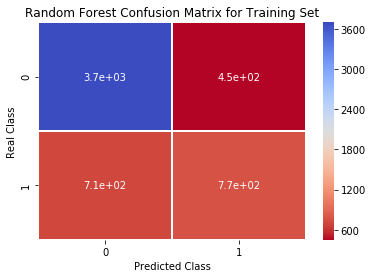

Cross Validation Accuracy Scores: 0.779(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.765(+/- 0.06)


In [42]:
# Print classification report
print(classification_report(Y_train, Y_pred_rfc, target_names=['Churn_No', 'Churn_Yes']))

#building confusion matrix
conf_matrix_rfc = confusion_matrix(Y_train, Y_pred_rfc)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_rfc, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Random Forest Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_rfc = cross_val_score(rfc, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_rfc.mean(), scores_rfc.std()*2))

scores_rfcTest = cross_val_score(rfc, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_rfcTest.mean(), scores_rfcTest.std()*2))

### Decision Tree

In [43]:
clf = DecisionTreeClassifier()

In [44]:
# Define the parameter values that should be searched
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion' : ['gini', 'entropy']} 

In [45]:
# instantiate and fit the grid
start = time.time()
grid = GridSearchCV(clf, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_clf = grid.predict(X_train)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Runtime 110.96


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  1.8min finished


In [46]:
# view the complete results
grid.grid_scores_

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 30},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 50},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 70},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 90},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 110},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 130},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 150},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 170},
 mean: 0.73707, std: 0.00037, params: {'criterion': 'gini', 'max_depth': 1, 'm

In [47]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.794311111111
{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 50}


In [48]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=50)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   Churn_No       0.85      0.91      0.88      4146
  Churn_Yes       0.67      0.54      0.60      1479

avg / total       0.80      0.81      0.80      5625



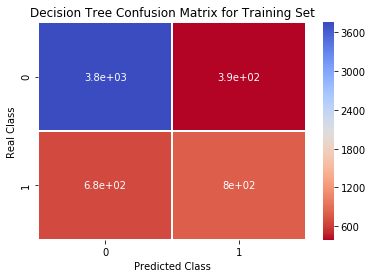

Cross Validation Accuracy Scores: 0.794(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.769(+/- 0.04)


In [49]:
# Print classification report
print(classification_report(Y_train, Y_pred_clf, target_names=['Churn_No', 'Churn_Yes']))

#building confusion matrix
conf_matrix_clf = confusion_matrix(Y_train, Y_pred_clf)

# Creating heatmap of confusion matrix
sns.heatmap(conf_matrix_clf, 
            cmap='coolwarm_r', 
            annot=True, 
            linewidths=0.5)
plt.title('Decision Tree Confusion Matrix for Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.show()

scores_clf = cross_val_score(clf, X_train, Y_train, cv=10)
print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores_clf.mean(), scores_clf.std()*2))

scores_clfTest = cross_val_score(clf, X_validation, Y_validation, cv=10)
print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_clfTest.mean(), scores_clfTest.std()*2))

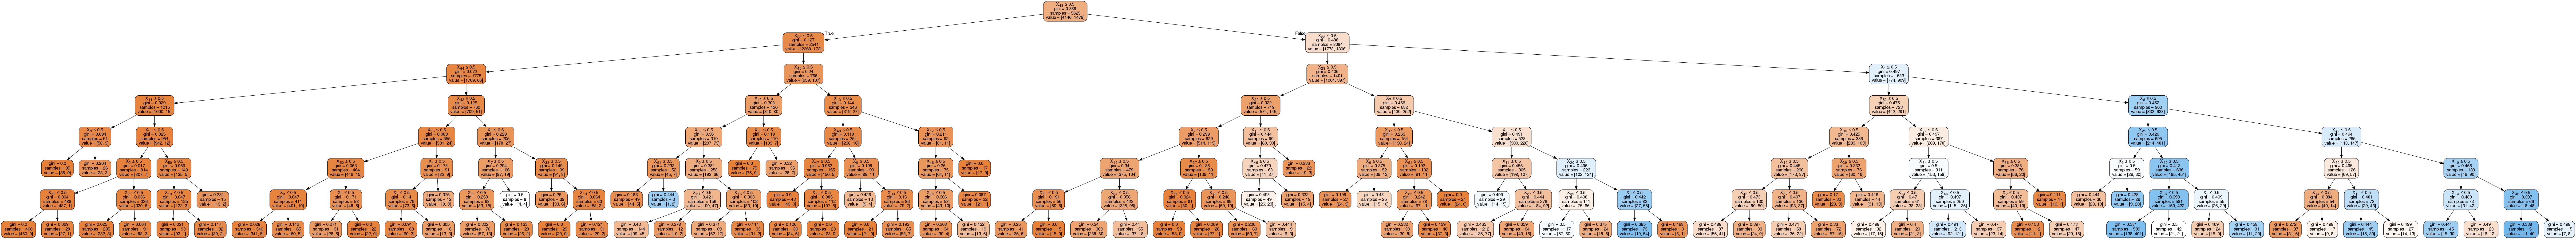

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### PCA

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(X_train)

In [53]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [54]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 52
Reduced number of features: 24


In [55]:
X_pca

array([[ -3.72480847e-01,   8.40183679e-01,   3.85237205e-01, ...,
          1.29969703e+00,   1.87084509e+00,   8.83195779e-01],
       [ -3.24099839e-01,  -5.10080178e-01,   1.56977008e-01, ...,
          1.26339710e-03,   4.19017452e-01,   3.00453767e+00],
       [ -5.96246234e-01,  -8.86174955e-01,  -7.40471403e-01, ...,
          1.98457684e-01,   9.16891831e-01,  -8.30847009e-01],
       ..., 
       [ -6.06390782e-01,   9.16874631e-01,  -6.97155876e-01, ...,
          6.49686086e-01,  -9.64293951e-01,   7.84444621e-01],
       [ -2.14855722e-01,  -1.32615407e+00,   8.02542542e-01, ...,
         -5.03983927e-01,  -5.89141570e-01,  -1.41338418e-01],
       [ -6.58617352e-01,   8.67104905e-01,  -8.59273574e-01, ...,
         -1.16583362e+00,   3.00664149e-01,  -9.58854900e-02]])

In [56]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y_train)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

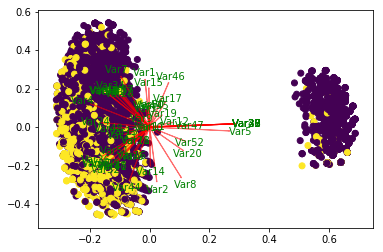

In [57]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### Fitting PCA on Logistic Regression

In [58]:
log_reg_model.fit(X_pca, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
Y_validation_transformed = pca.transform(Y_validation)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 1 ..., 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('log_reg', log_reg_model)])

pipe.fit(X_train, Y_train)

#pipe.predict(Y_validation)

In [ ]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

In [ ]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

In [ ]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

In [ ]:
from sklearn.cross_validation import KFold
import warnings
warnings.filterwarnings('ignore')

def run_prob_cv(X, y, clf_class, **kwargs):
   kf = KFold(len(y), n_folds=5, shuffle=True)
   y_prob = np.zeros((len(y),2))
   for train_index, test_index in kf:
      X_train, X_test = X[train_index], X[test_index]
      y_train = y[train_index]
      clf = clf_class(**kwargs)
      clf.fit(X_train,y_train)
      y_prob[test_index] = clf.predict_proba(X_test)
   return y_prob

In [ ]:
pred_prob = run_prob_cv(X, Y, LogisticRegression)
pred_churn = pred_prob[:,1]
is_churn = Y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
 true_prob[prob] = np.mean(is_churn[pred_churn == prob])
 true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})

In [ ]:
result = pd.DataFrame(X[pred_prob[:,1]>0.8], columns=features)

In [ ]:
def undummy(df):
   x=result.stack()
   stacked=pd.DataFrame(x[x!=0].index.get_level_values(1))
   newdata=stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == 0]]
   for col in np.arange(1,19):
      newdata=pd.concat([newdata.reset_index(drop=True),stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == col]].reset_index(drop=True)],axis=1)
   newdata.columns = [x.partition('_')[0] for x in newdata.loc[0].values]
   newdata = pd.DataFrame([newdata[x].str.replace('(.*)_','') for x in newdata.columns]).T
   return newdata

In [ ]:
final = undummy(result)
final.describe().T